
# Hyrox dataset (filtrado) - EDA + modelo predictivo - DS2
**Alumno:** Sebastián Díaz  
**Curso:** Data Science II — CoderHouse   
**Comisión:** 74260  
**Fecha:** 21/10/2025

---



## Abstract
El presente análisis se basa en los resultados de competencias internacionales de HYROX, un evento deportivo exigente que combina carreras de resistencia con estaciones de ejercicios funcionales. La competencia comienza corriendo 1 km, seguido de un workout funcional. Este patrón se repite 8 veces, totalizando 8 kms y 8 workouts. El objetivo principal de este análisis es investigar cuáles son los factores que más influyen en el tiempo total de carrera, evaluando el rendimiento de los atletas a lo largo de las distintas estaciones y observando cómo varían dichos resultados entre los diferentes perfiles de competidores.
El dataset original, proveniente de resultados oficiales de HYROX 2022–2023 y obtenido de la plataforma Kaggle, fue filtrado para cumplir con los requisitos de la entrega (tener entre 2.000 y 5.000 filas y al menos 15 columnas numéricas). Se incluyeron variables como los tiempos por estación (Sled Push, Rowing, Wall Balls, etc.), tiempos parciales de carrera, tiempo total estimado (`total_time_sec_calc`), así como el slowing_index (que mide la diferencia relativa entre la segunda mitad del circuito y la primera) y la proporción de tiempo de estaciones vs. carrera (`pct_stations`).
El análisis busca responder si existen estaciones que sistemáticamente afectan el rendimiento global de los atletas, si ciertos segmentos del recorrido generan mayor fatiga o lentitud, y si hay diferencias de rendimiento en función del género. A través de visualizaciones y análisis numéricos, se identifican patrones de rendimiento y relaciones entre variables claves.
Además del análisis exploratorio, se implementaron modelos de aprendizaje automático con el objetivo de predecir el tiempo total de un atleta en función de sus tiempos parciales y su desempeño en las estaciones. Se compararon distintos algoritmos de regresión (regresión lineal y random forest regressor) y se evaluó su desempeño utilizando métricas como R², MAE, RMSE y MAPE (%). Esto permitió no solo describir los datos, sino también demostrar el potencial de los modelos predictivos en el ámbito del rendimiento deportivo.
La herramienta utilizada fue Python, con librerías como pandas, matplotlib, seaborn y scikit-learn, que permitieron realizar tanto el procesamiento de datos como los gráficos, insights y el modelado predictivo. Parte del objetivo también es construir una serie de pasos organizados y secuenciales que puedan ser reutilizados en futuros análisis deportivos.
Con este proyecto busco generar valor que pueda ser utilizado como ejemplo real para el análisis deportivo.



## Preguntas e hipótesis
1 - Qué estación consume más tiempo promedio y afecta más el rendimiento global?
Hipótesis 1: Sled Push y Sled Pull son las estaciones más demandantes en tiempo, teniendo gran impacto en el tiempo total.

2 - Existe una relación entre el slowing_index y el tiempo total?
Hipótesis 2: Un slowing_index más alto (más lento en la segunda mitad del circuito) está relacionado con un mayor tiempo total de carrera.

3 - El género de los atletas tiene algo que ver con los tiempos totales?
Hipótesis 3: Existen diferencias de tiempo entre hombres y mujeres.

4 - Cuál es la proporción de tiempo que se dedica a las estaciones funcionales vs. la que se dedica a la carrera?
Hipótesis 4: Dependiendo del perfil del atleta, un 40 o 50% del tiempo total se consume en estaciones funcionales.

5 - Las estaciones finales (wall balls o lunges) reflejan mayor lentitud debido a la fatiga acumulada?
Hipótesis 5: El rendimiento en estaciones finales es menor en promedio.

6 - Podemos predecir el tiempo total de un atleta en base a sus parciales de estaciones?
Hipótesis 6: Los tiempos parciales de las estaciones permiten construir un modelo de regresión con buen desempeño predictivo.


## Carga del dataset procesado


In [1]:

import pandas as pd

# Carga del dataset procesado
df = pd.read_csv("Hyrox_procesado_SDP.csv")
df.shape, df.head()


((5000, 38),
       event_id         event_name gender nationality age_group division  \
 0  2EFMS4JI3AD     S5 2022 London   male         GBR     55-59     open   
 1  JGDMS4JI474      S5 2023 Miami   male         USA     30-34     open   
 2  JGDMS4JI3D5      S5 2022 Essen   male         GER     16-24     open   
 3  JGDMS4JI47A     S5 2023 London   male         GBR     45-49     open   
 4  JGDMS4JI656  S6 2023 Stockholm   male         SWE     50-54     open   
 
     work_1   work_2   work_3   work_4  ... run_6_sec roxzone_6_sec run_7_sec  \
 0  0:04:35  0:03:30  0:04:56  0:04:47  ...       322           109       323   
 1  0:04:25  0:05:09  0:05:22  0:05:19  ...       423            14       427   
 2  0:05:25  0:03:01  0:06:07  0:04:59  ...       374            89       368   
 3  0:04:53  0:02:46  0:06:15  0:07:53  ...       357            65       358   
 4  0:04:25  0:02:17  0:04:43  0:04:44  ...       299            67       297   
 
   roxzone_7_sec  run_8_sec  roxzone_8_se


## Validación rápida


In [2]:

df.info() #Información general
df.describe().T.head() #Estadísticas descriptivas
df.isnull().sum().sort_values(ascending=False).head(10) #Valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_id             5000 non-null   object 
 1   event_name           5000 non-null   object 
 2   gender               5000 non-null   object 
 3   nationality          4994 non-null   object 
 4   age_group            4998 non-null   object 
 5   division             5000 non-null   object 
 6   work_1               5000 non-null   object 
 7   work_2               5000 non-null   object 
 8   work_3               5000 non-null   object 
 9   work_4               5000 non-null   object 
 10  work_5               5000 non-null   object 
 11  work_6               5000 non-null   object 
 12  work_7               5000 non-null   object 
 13  work_8               5000 non-null   object 
 14  total_time_sec       5000 non-null   int64  
 15  work_time_sec        5000 non-null   i

,0
nationality,6
age_group,2
slowing_index,1
event_name,0
gender,0
event_id,0
division,0
work_1,0
work_3,0
work_2,0



## Visualizaciones (3 Matplotlib + 3 Seaborn)


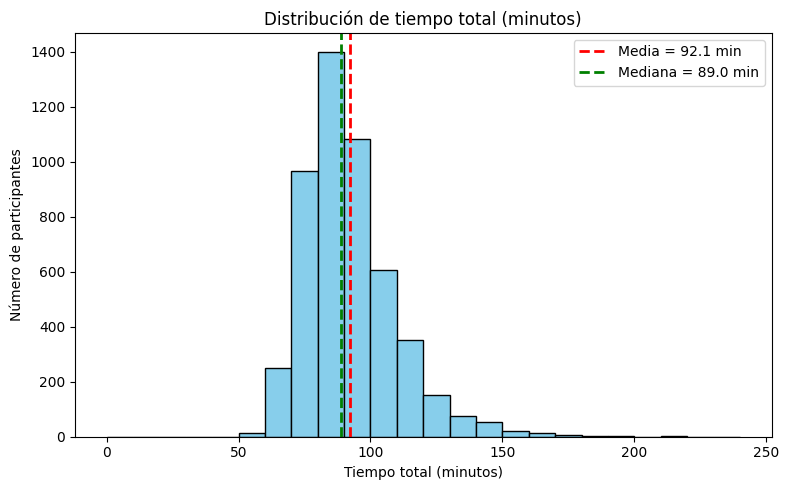

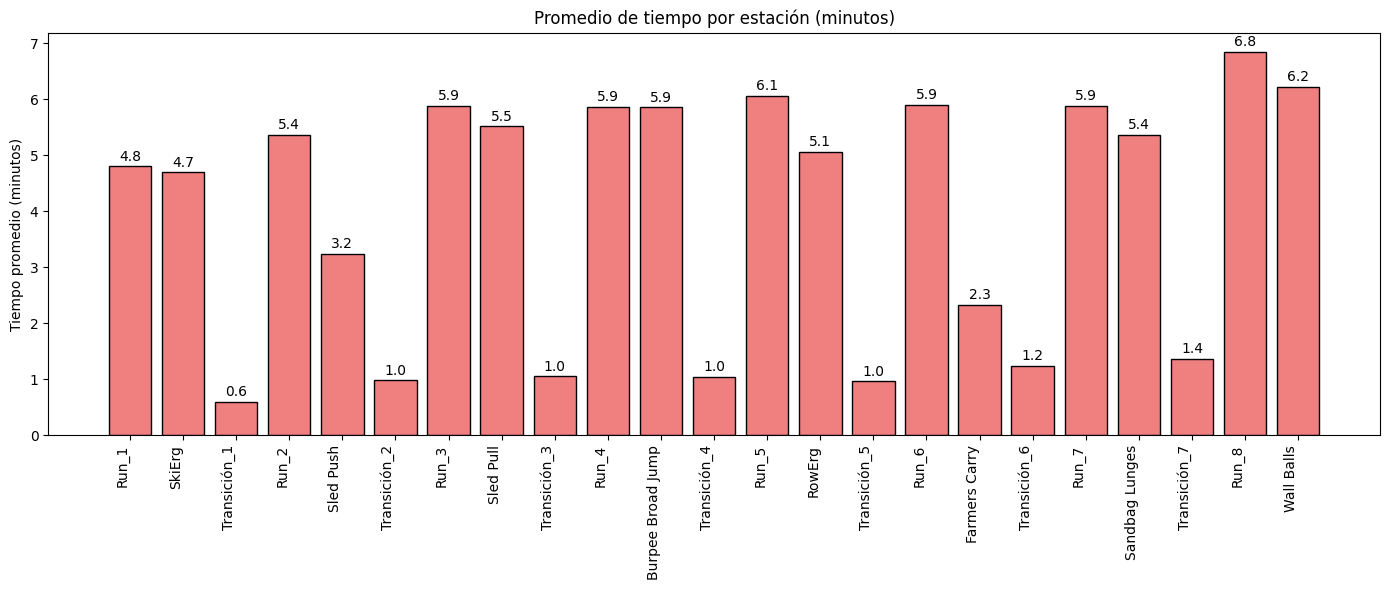

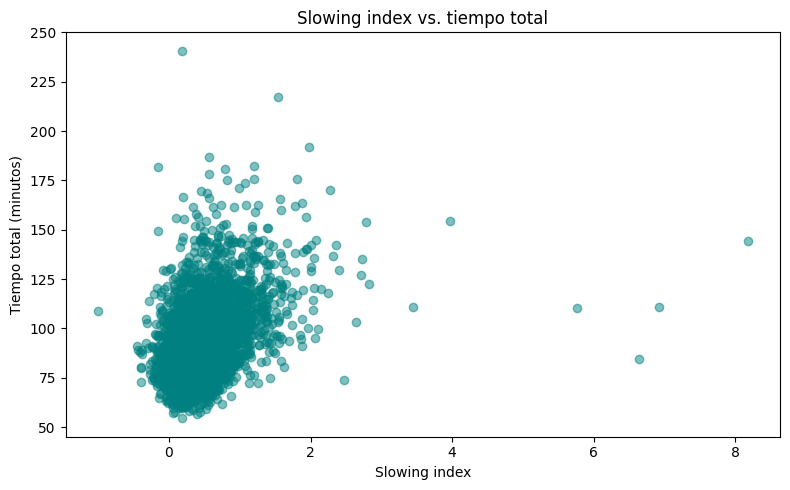

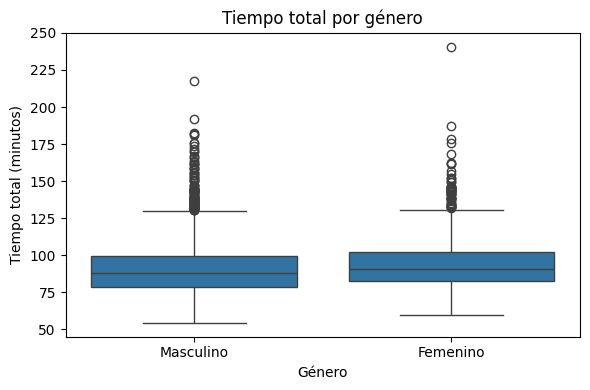

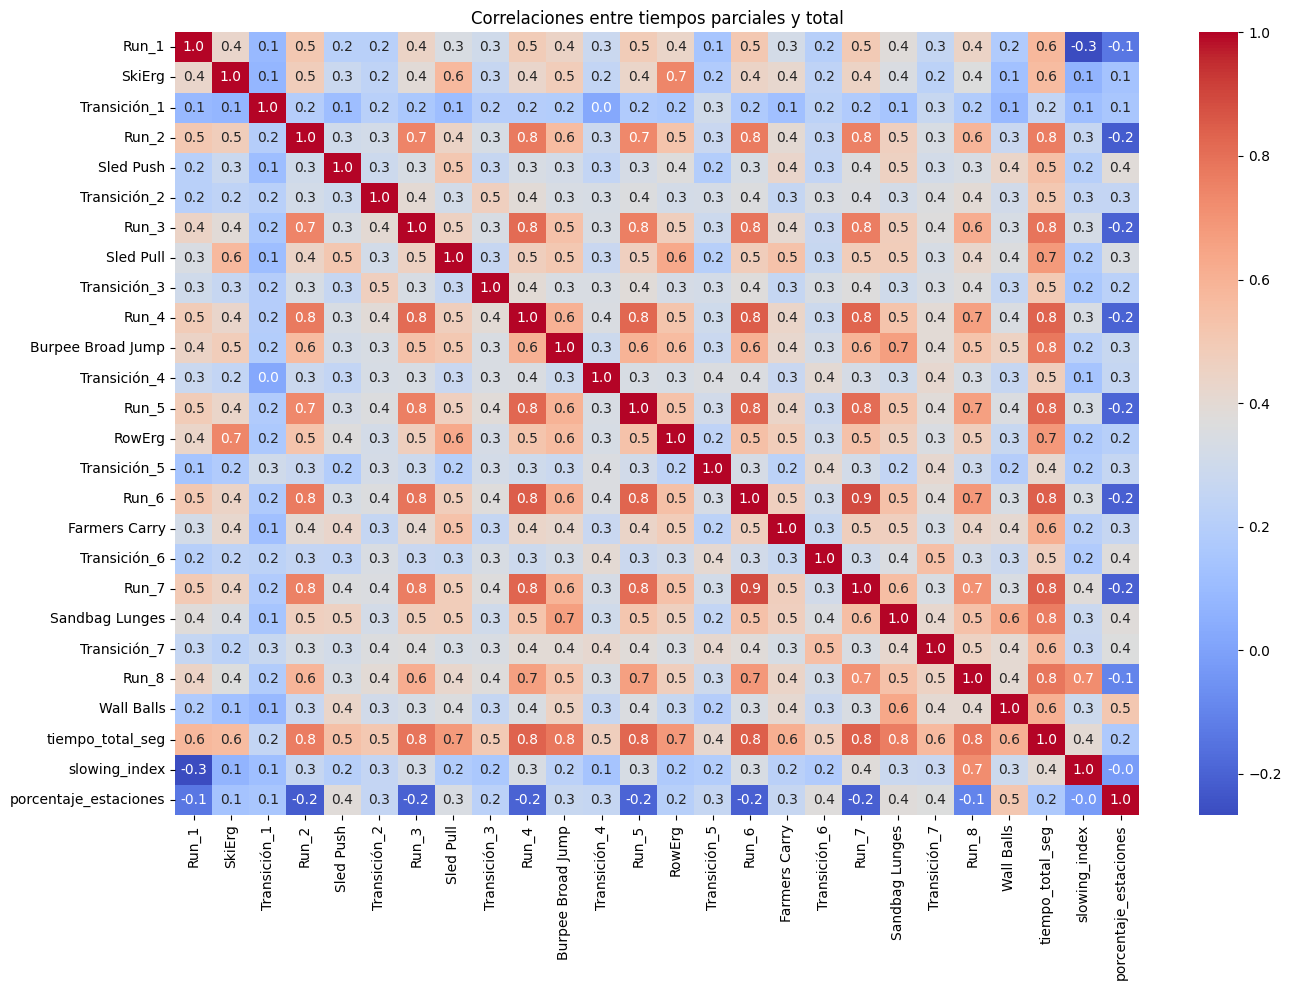

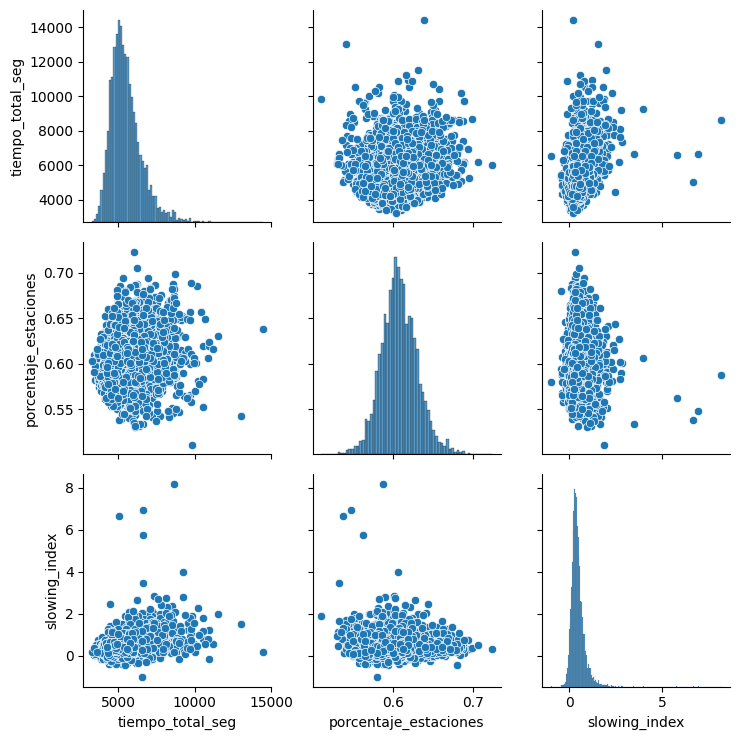

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de base de datos procesada
df = pd.read_csv("Hyrox_procesado_SDP.csv")

# Filtrado de datos
df = df[df['total_time_sec'].notna()] # Elimino los NaN, si es que hay.
df = df[df['total_time_sec'] > 0] # Elimino tiempos que no tienen sentido, si es que existen.

# Tiempo total en minutos
df['total_time_min'] = df['total_time_sec'] / 60 # En la competencia la comparación es en minutos.

# Renombrado de las columnas, para mayor entendimiento
rename_dict = {
    # run_x: corridas
    # roxzone_x: transiciones run-work
    'run_1_sec': 'Run_1',
    'roxzone_1_sec': 'Transición_1',
    'run_2_sec': 'Run_2',
    'roxzone_2_sec': 'Transición_2',
    'run_3_sec': 'Run_3',
    'roxzone_3_sec': 'Transición_3',
    'run_4_sec': 'Run_4',
    'roxzone_4_sec': 'Transición_4',
    'run_5_sec': 'Run_5',
    'roxzone_5_sec': 'Transición_5',
    'run_6_sec': 'Run_6',
    'roxzone_6_sec': 'Transición_6',
    'run_7_sec': 'Run_7',
    'roxzone_7_sec': 'Transición_7',
    'run_8_sec': 'Run_8',
    # work_x: ejercicios
    'work_1': 'SkiErg',
    'work_2': 'Sled Push',
    'work_3': 'Sled Pull',
    'work_4': 'Burpee Broad Jump',
    'work_5': 'RowErg',
    'work_6': 'Farmers Carry',
    'work_7': 'Sandbag Lunges',
    'work_8': 'Wall Balls',
}

df = df.rename(columns=rename_dict) # Cambio los nombres según el diccionario creado.

# Convertir tiempos de estaciones (si están como string tipo '00:05:00')
for col in rename_dict.values(): # Recorro las columnas nombradas.
    if df[col].dtype == 'object':
        df[col] = pd.to_timedelta(df[col]).dt.total_seconds() # Convierto string de tiempo en objeto timedelta de Pandas.

# Gráfica 1: Histograma del tiempo total corregido
plt.figure(figsize=(8, 5))

bins = range(0, int(df['total_time_min'].max()) + 10, 10) # Agrupo los tiempos cada 10 min.
plt.hist(df['total_time_min'], bins=bins, color='skyblue', edgecolor='black') # Color celeste con bordes negros.

media = df['total_time_min'].mean() # Promedio
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media = {media:.1f} min') # Media con línea roja punteada.

mediana = df['total_time_min'].median()# Mediana (valor central).
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana = {mediana:.1f} min') # Mediana con línea punteada verde.

plt.title('Distribución de tiempo total (minutos)')
plt.xlabel('Tiempo total (minutos)')
plt.ylabel('Número de participantes')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfica 2: Promedios de tiempo por estación
ordered_cols = [
    'Run_1', 'SkiErg', 'Transición_1',            # Nombre de cada estación: Run+Work+Transición.
    'Run_2', 'Sled Push', 'Transición_2',
    'Run_3', 'Sled Pull', 'Transición_3',
    'Run_4', 'Burpee Broad Jump', 'Transición_4',
    'Run_5', 'RowErg', 'Transición_5',
    'Run_6', 'Farmers Carry', 'Transición_6',
    'Run_7', 'Sandbag Lunges', 'Transición_7',
    'Run_8', 'Wall Balls'
]

mean_stations_min = df[ordered_cols].mean() / 60 # Tomo las columnas ordenadas del dataframe y las paso a minutos.

plt.figure(figsize=(14, 6))
bars = plt.bar(mean_stations_min.index, mean_stations_min.values, color='lightcoral', edgecolor='black') # Gráfico de barras.
plt.xticks(rotation=90, ha='right')
plt.title('Promedio de tiempo por estación (minutos)')
plt.ylabel('Tiempo promedio (minutos)')

for bar in bars:
    height = bar.get_height() # Recorro barras, mido altura y coloco texto arriba.
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"{height:.1f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Gráfica 3: Scatter (o gráfico de dispersión): slowing_index vs. tiempo total (en minutos)
plt.figure(figsize=(8, 5))
plt.scatter(df['slowing_index'], df['total_time_min'], alpha=0.5, color='teal') #Explico el slowing index en los Insights.
plt.title('Slowing index vs. tiempo total')
plt.xlabel('Slowing index')
plt.ylabel('Tiempo total (minutos)')
plt.tight_layout()
plt.show()

# Gráfica 4: Boxplot (o diagrama de caja): por género (y en minutos)
if 'gender' in df.columns:
    df['género'] = df['gender'].replace({'male': 'Masculino', 'female': 'Femenino'})
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='género', y='total_time_min')
    plt.title('Tiempo total por género')
    plt.xlabel('Género')
    plt.ylabel('Tiempo total (minutos)')
    plt.tight_layout()
    plt.show()

# Gráfica 5: Heatmap (o mapa de calor) de correlaciones /// Cuanto más alto o bajo es un valor, más intenso o distinto es el color.
corr_cols = ordered_cols + ['total_time_sec', 'slowing_index', 'pct_stations']
corr = df[corr_cols].corr()

new_labels = {
    'total_time_sec': 'tiempo_total_seg',
    'pct_stations': 'porcentaje_estaciones',
}
corr = corr.rename(index=new_labels, columns=new_labels)

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Correlaciones entre tiempos parciales y total')
plt.tight_layout()
plt.show()

# Gráfica 6: Pairplot (o gráfico de pares) con etiquetas más entendibles
df_rename = df[['total_time_sec', 'pct_stations', 'slowing_index']].dropna().rename(columns={
    'total_time_sec': 'tiempo_total_seg',
    'pct_stations': 'porcentaje_estaciones'
})

sns.pairplot(df_rename)
plt.tight_layout()
plt.show()



# Insights del EDA

A partir del análisis de los datos y las visualizaciones realizadas, podemos destacar varios puntos importantes sobre el rendimiento en el evento Hyrox:

- **Distribución del tiempo total:**  
  El histograma muestra que la mayoría de los participantes finalizan en un rango entre 50 y 150 minutos, con un promedio cercano a 92 minutos. La media y la mediana están bastante cercanas, lo que indica que la distribución no está muy sesgada, aunque hay algunos valores atípicos con tiempos mucho mayores (hasta 240 minutos) que pueden deberse a que el atleta terminó la competencia con algún inconveniente ya que en Hyrox los tiempos rondan los 50 a 75 minutos (nivel elite), aproximadamente.

- **Tiempos promedio por estación:**  
  Las estaciones de carrera (Run_x) representan la mayor parte del tiempo total, especialmente Run_8, que es la más larga con un promedio cercano a 6.8 minutos. Las transiciones (Transición_x) tienen tiempos muy bajos, salvo la excepción de la transición final que es cero porque marca el final del evento. Los ejercicios funcionales (como SkiErg, Sled Push, Wall Balls) varían entre aproximadamente 2 y 8 minutos promedio, reflejando la complejidad y el esfuerzo requerido en cada estación.

- **Slowing index y rendimiento:**  
  El scatterplot (o gráfico de dispersión) entre el índice de desaceleración y el tiempo total muestra que aquellos con un slowing index cercano a 1 mantienen un ritmo constante durante el evento. Valores menores a 1 indican que aceleraron en la segunda mitad, y mayores a 1 sugieren que se desaceleraron. En general, los atletas con mejores tiempos tienden a mantener un ritmo estable o incluso acelerar.

- **Diferencias por género:**  
  El boxplot (o diagrama de caja) revela diferencias claras en el tiempo total entre géneros, donde los hombres ("Masculino") tienden a completar el evento en menos tiempo que las mujeres ("Femenino"). Esto podría estar relacionado con diferencias físicas promedio, pero también invita a profundizar en otros factores como la edad, experiencia o estrategia de cada atleta.

- **Correlaciones:**  
  El heatmap (o mapa de calor) indica que los tiempos en las estaciones están fuertemente correlacionados entre sí, especialmente dentro de las mismas categorías (runs, transiciones y ejercicios). Además, hay una alta correlación entre el tiempo total y las estaciones de carrera, lo que reafirma que el tiempo invertido en correr es el principal determinante del rendimiento final.

- **Relaciones entre variables clave:**  
  El pairplot (o gráfico de pares) permite visualizar mejor las relaciones entre el tiempo total, el porcentaje completado de estaciones y el slowing index. Se confirma la tendencia de que quienes completan más porcentaje de estaciones tienen mejores tiempos y mantienen ritmos más constantes.

# Procesamiento de datos para modelado

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defino lista de columnas correspondientes a las estaciones (o workouts)
station_cols = [
    'SkiErg',
    'Sled Push',
    'Sled Pull',
    'Burpee Broad Jump',
    'RowErg',
    'Farmers Carry',
    'Sandbag Lunges',
    'Wall Balls'
]

# Preparación de datos para los modelos de ML

# Separamos las features (X) de la variable target (y)
X = df[station_cols]  # X (features) son todas las columnas predictoras como los tiempos de las estaciones, el slowing_index y los pct_stations
y = df["total_time_sec_calc"] # Y (target) es la variable que queremos predecir, en este caso el tiempo total

# Dividimos los datos en entrenamiento (train) y conjunto de prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train: el modelo aprende acá
#Test: Se guardan para evaluar qué tan bien predice con datos que nunca vió

# Escalado o normalización para que las variables numéricas estén en rangos comparables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Con esto, los datos quedan limpios, normalizados separados en entrenamiento y prueba.

# Selección de estaciones (features)

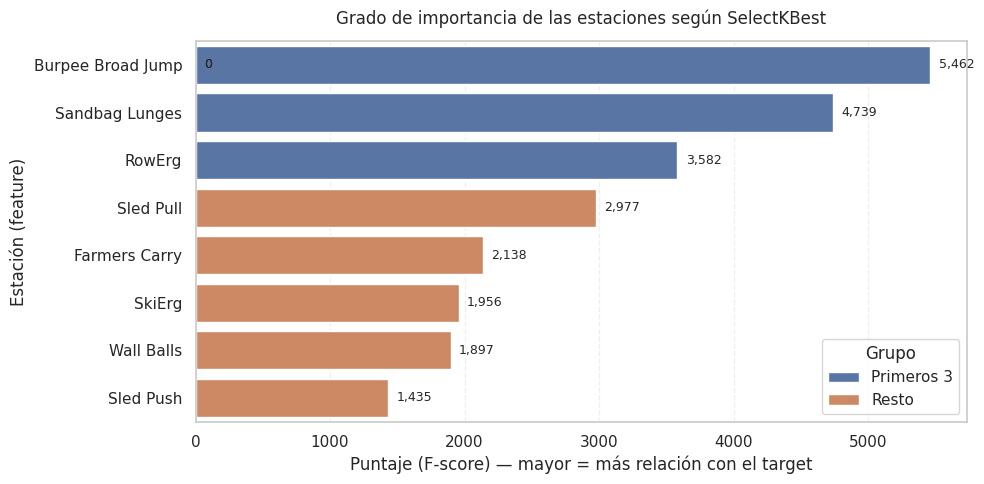

,Estación (feature),Puntaje (score),Ranking,% del máximo,Grupo
0,Burpee Broad Jump,"5,461.69",1,100.0%,Primeros 3
1,Sandbag Lunges,"4,738.87",2,86.8%,Primeros 3
2,RowErg,"3,581.70",3,65.6%,Primeros 3
3,Sled Pull,"2,976.70",4,54.5%,Resto
4,Farmers Carry,"2,137.94",5,39.1%,Resto
5,SkiErg,"1,956.26",6,35.8%,Resto
6,Wall Balls,"1,897.36",7,34.7%,Resto
7,Sled Push,"1,434.61",8,26.3%,Resto


In [5]:
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Estilo visual de seaborn
sns.set_theme(style="whitegrid") # fondo claro con grid

# En esta sección medimos qué variables son más relevantes para predecir el tiempo total.
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train_scaled, y_train)

# Puntuación (ranking/score) de las estaciones (features) más importantes
feature_scores = (
    pd.DataFrame({
        "Estación (feature)": station_cols,
        "Puntaje (score)": selector.scores_
    })
    .sort_values(by="Puntaje (score)", ascending=False)
    .reset_index(drop=True)
)

# Agrego columnas auxiliares para el gráfico
feature_scores["Ranking"] = feature_scores.index + 1
feature_scores["% del máximo"] = (
    feature_scores["Puntaje (score)"] / feature_scores["Puntaje (score)"].max() * 100
)
# Etiqueta para destacar los primeros 3 (más relevantes)
feature_scores["Grupo"] = np.where(feature_scores["Ranking"] <= 3, "Primeros 3", "Resto")

# Gráfico de barras horizontal
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=feature_scores,
    x="Puntaje (score)",
    y="Estación (feature)",
    hue="Grupo", # activamos hue para evitar errores al compilar (o warnings) y resaltar los primeros 3
    dodge=False # elijo una barra por fila (no duplica)
    )

# Título y textos
ax.set_title("Grado de importancia de las estaciones según SelectKBest", pad=12)
ax.set_xlabel("Puntaje (F-score) — mayor = más relación con el target")
ax.set_ylabel("Estación (feature)")

# Etiquetas con número para las barras
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{width:,.0f}", # separador de miles
                (p.get_x() + width, p.get_y() + p.get_height()/2),
                xytext=(6, 0),
                textcoords="offset points",
                va="center", ha="left", fontsize=9)

# Mejoro los gráficos
ax.legend(title="Grupo", loc="lower right", frameon=True)
ax.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Ordeno la tabla
feature_scores.style.format({
    "Puntaje (score)": "{:,.2f}",
    "% del máximo": "{:.1f}%"
})

# Con esto, quedan identificadas las estaciones (tiempos) que más influyen en el resultado final.

# Modelos predictivos y métricas

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Entrenamos los modelos de ML con los datos. Probamos dos enfoques distintos para poder comparar.

# Modelo 1: Regresión lineal - que supone relaciones lineales simples entre X e Y.
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Modelo 2: Random forest - que usa muchos árboles de decisión en conjunto, más flexible y potente.
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


# Métricas

# R2:       Coeficiente de determinación. Cuanto más cerca de 1, mejor.
# MAE:      Error absoluto medio. Diferencia promedio en segundos de lo predicho con lo real.
# RMSE:     Raíz del error cuadrático medio. Penaliza más los errores grandes.
# MAPE (%): Error porcentual absoluto medio. Desvío (en %) del valor real.

# Ambos modelos aprenden
results = pd.DataFrame({
    "Modelo": ["Regresión lineal", "Random forest"],
    "R2": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)],
    "MAE": [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    "MAPE (%)": [np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100, np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100]
})

# Mejoro la visualización de la tabla
display(results.style.format({
    "R2": "{:.3f}",
    "MAE": "{:.2f}",
    "RMSE": "{:.2f}",
    "MAPE (%)": "{:.2f}%"
}))

# Con esto, creamos dos modelos que distintos que intentan aprender a predecir el tiempo total.

,Modelo,R2,MAE,RMSE,MAPE (%)
0,Regresión lineal,0.776,885.28,1210.24,6.12%
1,Random forest,0.771,897.81,1224.91,6.20%


# Comparación de modelos

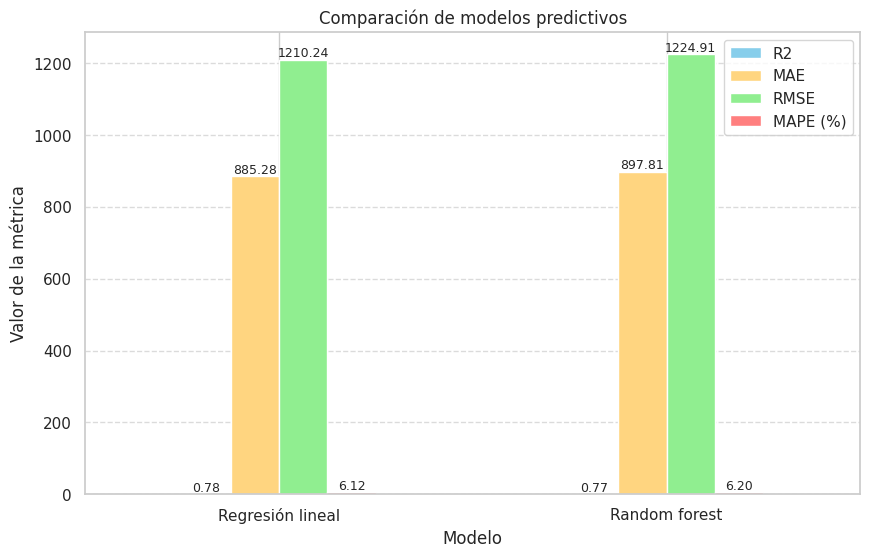

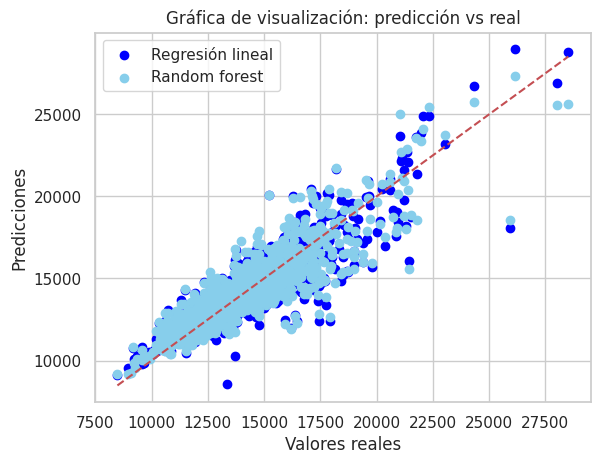

In [7]:
# Métricas

# R2:       Coeficiente de determinación. Cuanto más cerca de 1, mejor.
# MAE:      Error absoluto medio. Diferencia promedio en segundos de lo predicho con lo real.
# RMSE:     Raíz del error cuadrático medio. Penaliza más los errores grandes.
# MAPE (%): Error porcentual absoluto medio. Desvío (en %) del valor real.


# En la comparación, debemos medir qué tan bien predice cada modelo.

# Variables para gráfico de barras
metricas = ["R2", "MAE", "RMSE", "MAPE (%)"]
colores = ["#87CEEB", "#FFD580", "#90EE90", "#FF7F7F"]  # colores por métrica

ax = results.set_index("Modelo")[metricas].plot(kind="bar", figsize=(10,6), color=colores)
plt.title("Comparación de modelos predictivos")
plt.ylabel("Valor de la métrica")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Muestro los valores encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.show()

# Validación del modelo en forma visual
plt.scatter(y_test, y_pred_lr, color='blue', label='Regresión lineal')
plt.scatter(y_test, y_pred_rf, color='#87CEEB', label='Random forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Gráfica de visualización: predicción vs real")
plt.legend()
plt.show()

# Con esto, vemos qué modelo predice mejor y con qué error.

## Resumen de conclusiones parciales

### 1) EDA (análisis exploratorio de datos)
- El análisis exploratorio (EDA) confirmó que **Sled Push** y **Sled Pull** son las estaciones más demandantes para los atletas.
- El **slowing_index** se correlaciona con un mayor tiempo total, indicando que la desaceleración afecta el desempeño global de los atletas.
- Existen diferencias significativas entre géneros (hombres y mujeres) en tiempos totales.
- Entre un 40% y un 50% del tiempo total se dedica a las estaciones.
- La fatiga acumulada impacta en las últimas estaciones, lo que puede servir para planificar estrategias de entrenamiento.

### 2) Modelado predictivo
- Ambos modelos, regresión lineal y random forest, logran un ajuste razonable, con R² ≈ 0.77, indicando que aproximadamente el 77% de la variabilidad del tiempo total se explica por las variables incluidas.

- La regresión lineal es más interpretable: permite ver qué estaciones influyen más y en qué dirección, pero tiende a subestimar ligeramente los tiempos más altos.

- Random forest tiene un desempeño muy similar: MAE = 897.8 s, RMSE = 1224.9 s, MAPE = 6.2%, mostrando un error promedio del 6% respecto al tiempo real.

- Las diferencias entre ambos modelos son mínimas, por lo que un modelo lineal puede ser suficiente. Random forest podría ser más robusto si el dataset creciera o incluyera relaciones no lineales o ruido adicional.

##Conclusión crítica

- Dado que ambos modelos presentan métricas similares, la elección puede basarse en interpretabilidad (regresión lineal) vs. robustez (random forest).

- Esta información es útil para la planificación de entrenamientos, priorizando estaciones críticas y entendiendo la variabilidad entre atletas.

# Conclusión final

### Se confirma que **es posible predecir el tiempo total de los atletas en base a parciales de estaciones**.

# Enriquecimiento (Para DS II)

In [8]:
from google.colab import files # Nueva forma de subir o descargar archivos
import pandas as pd

uploaded = files.upload() # Esta forma lo sube seleccionando el archivo, y no es necesario subirlo de forma manual

for fn in uploaded.keys():
  print('El usuario subió el archivo "{name}" con un tamaño de {length} bytes.'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(fn)
  print(f'Se cargó el archivo "{fn}" en el DataFrame "df".')
  break  # Suponemos que solo se sube un archivo

display(df.head())

Saving Hyrox_procesado_SDP.csv to Hyrox_procesado_SDP (1).csv
El usuario subió el archivo "Hyrox_procesado_SDP (1).csv" con un tamaño de 1257413 bytes.
Se cargó el archivo "Hyrox_procesado_SDP (1).csv" en el DataFrame "df".


,event_id,event_name,gender,nationality,age_group,division,work_1,work_2,work_3,work_4,...,run_6_sec,roxzone_6_sec,run_7_sec,roxzone_7_sec,run_8_sec,roxzone_8_sec,total_time_sec_calc,pct_stations,pct_runs,slowing_index
0,2EFMS4JI3AD,S5 2022 London,male,GBR,55-59,open,0:04:35,0:03:30,0:04:56,0:04:47,...,322,109,323,109,379,0,14769,0.654276,0.345724,0.242623
1,JGDMS4JI474,S5 2023 Miami,male,USA,30-34,open,0:04:25,0:05:09,0:05:22,0:05:19,...,423,14,427,59,459,0,15400,0.584286,0.415714,0.850806
2,JGDMS4JI3D5,S5 2022 Essen,male,GER,16-24,open,0:05:25,0:03:01,0:06:07,0:04:59,...,374,89,368,89,420,0,16301,0.607754,0.392246,0.312500
3,JGDMS4JI47A,S5 2023 London,male,GBR,45-49,open,0:04:53,0:02:46,0:06:15,0:07:53,...,357,65,358,87,425,0,15051,0.618098,0.381902,0.402640
4,JGDMS4JI656,S6 2023 Stockholm,male,SWE,50-54,open,0:04:25,0:02:17,0:04:43,0:04:44,...,299,67,297,74,341,0,12269,0.604695,0.395305,0.042813


In [9]:
df.columns # Para ver las columnas rápidamente

Index(['event_id', 'event_name', 'gender', 'nationality', 'age_group',
       'division', 'work_1', 'work_2', 'work_3', 'work_4', 'work_5', 'work_6',
       'work_7', 'work_8', 'total_time_sec', 'work_time_sec',
       'roxzone_time_sec', 'run_time_sec', 'run_1_sec', 'roxzone_1_sec',
       'run_2_sec', 'roxzone_2_sec', 'run_3_sec', 'roxzone_3_sec', 'run_4_sec',
       'roxzone_4_sec', 'run_5_sec', 'roxzone_5_sec', 'run_6_sec',
       'roxzone_6_sec', 'run_7_sec', 'roxzone_7_sec', 'run_8_sec',
       'roxzone_8_sec', 'total_time_sec_calc', 'pct_stations', 'pct_runs',
       'slowing_index'],
      dtype='object')

Definición de imports y configuración

In [11]:
import numpy as np
import pandas as pd
import time         # Para medir los tiempos de los procesos. Por ejemplo, lo que tarda un modelo.
import warnings                     # Oculto mensajes de advertencias
warnings.filterwarnings("ignore")   # para una vista más limpia.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GroupKFold, KFold, cross_val_score # Validación cruzada.
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance # Importancia de cada variable.

RANDOM_STATE = 42 # Número semilla, para asegurar mismos resultados aleatorios cada vez.
OUT = "/content/hyrox_enriquecido_opt.csv" # Ruta típica en Colab.
MAX_MODEL_ROWS = 10000  # Muestra para modelado, para no saturar la RAM.
MIN_ROWS_FOR_MODEL = 50 # Mínimo de 50 filas para entrenar el modelo.

start_time = time.time() # Guardo el tiempo inicial del script por si quiero calcular cuánto duró el proceso.

Funciones útiles.

In [14]:
# Parseo tiempos - convierto cadena de texto que representa un tiempo, en segundos.
def parse_time_to_seconds(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    s = s.replace(',', '.')
    if ':' in s:
        parts = [p for p in s.split(':') if p!='']
        try:
            parts = [float(p) for p in parts]
        except:
            return np.nan
        if len(parts) == 3:
            h, m, sec = parts
            return float(h*3600 + m*60 + sec)
        elif len(parts) == 2:
            m, sec = parts
            return float(m*60 + sec)
        else:
            return np.nan
    else:
        try:
            return float(s)
        except:
            return np.nan

# Parseo run/work/roxzone a segundos - misma idea de pasaje de cadena de texto a segundis.
for i in range(1,9):
    for prefix in ['run_', 'work_', 'roxzone_']:
        col = f"{prefix}{i}"
        sec_col = f"{col}_sec"
        if col in df.columns:
            df[sec_col] = df[col].apply(parse_time_to_seconds)
        else:
            df[sec_col] = 0.0

# Creo columna total_time.
if 'total_time_sec' not in df.columns:
    raise RuntimeError("La columna 'total_time_sec' no existe en el DataFrame.") # Verifico existencia de la columna total_time_sec.
df['total_time_sec'] = df['total_time_sec'].apply(parse_time_to_seconds)
df['total_time_sec'] = df['total_time_sec'].fillna(pd.to_numeric(df['total_time_sec'], errors='coerce'))

print("total_time_sec: nulos =", int(df['total_time_sec'].isna().sum()), " media(s) =", float(df['total_time_sec'].mean()))

# Creo columna station_i que suma los tiempos totales de run, work y roxzone.
station_cols = []
for i in range(1,9):
    s = f'station_{i}'
    df[s] = df[[f'run_{i}_sec', f'work_{i}_sec', f'roxzone_{i}_sec']].sum(axis=1).fillna(0.0)
    station_cols.append(s)
print("Stations creadas:", station_cols) # Guardo en station_cols.

total_time_sec: nulos = 0  media(s) = 5524.731
Stations creadas: ['station_1', 'station_2', 'station_3', 'station_4', 'station_5', 'station_6', 'station_7', 'station_8']


Creación de nuevas variables derivadas, el objetivo de este bloque es describir mejor el rendimiento de cada participante.

In [15]:

# Features derivadas.
# pct por estación, es decir, porcentaje de cada estación en función del tiempo total de la carrera.
for s in station_cols:
    df[f'pct_{s}'] = df[s] / df['total_time_sec'].replace({0: np.nan})

df['sum_station_times'] = df[station_cols].sum(axis=1)
df['running_time_est'] = df['total_time_sec'] - df['sum_station_times']
df['stations_sum_consistent'] = (df['running_time_est'] >= -1.0) # Verifico consistencia de datos.

# z-scores globales y por gender si existe, es decir, cuántas desviaciones estándar está un valor respecto del promedio.
for s in station_cols:
    mu = df[s].mean()
    sigma = df[s].std(ddof=0) + 1e-9
    df[f'{s}_z'] = (df[s] - mu) / sigma

gender_col = None
for cand in ['gender','género','sex','sexo']:
    if cand in df.columns:
        gender_col = cand
        break
if gender_col:
    for s in station_cols:
        df[f'{s}_z_by_{gender_col}'] = df.groupby(gender_col)[s].transform(lambda x: (x - x.mean())/(x.std(ddof=0)+1e-9)) # Comparo rendimiento relativo por grupo (hombres y mujeres).
    print("Z-scores por", gender_col, "generados.")

# Pendiente de fatiga (fatigue slope).
def slope_vals(arr):
    vals = np.asarray(arr, dtype=float)
    idx = np.arange(vals.shape[0])
    if np.all(vals == 0) or np.isnan(vals).all():
        return 0.0
    m, b = np.polyfit(idx, vals, 1)
    return float(m)

df['fatigue_slope'] = df[station_cols].apply(lambda r: slope_vals(r.values), axis=1) # Pendiente lineal sobre los tiempos de las estaciones.
# Si la pendiente m es positiva indica que el atleta está más cansado; si es cero o negativa entonces mantuvo ritmo o mejoró, respectivamente.

# pct last 3, halves, ratios - para ver el tiempo de las últimas 3 estaciones y comparar.
df['pct_last_3_stations'] = df[[*station_cols[-3:]]].sum(axis=1) / df['total_time_sec'].replace({0:np.nan})
half = len(station_cols)//2
df['first_half_time'] = df[station_cols[:half]].sum(axis=1)
df['second_half_time'] = df[station_cols[half:]].sum(axis=1)
df['second_over_first_ratio'] = df['second_half_time'] / (df['first_half_time'] + 1e-9)
# 1 si se cansó en la segunda mitad de la carrera, <1 si mantuvo o mejoró el ritmo.

# Relación entre la última y la primera carrera.
df['sum_first_two_stations'] = df[station_cols[0]] + df[station_cols[1]]
df['ratio_last_first'] = df[station_cols[-1]] / (df[station_cols[0]] + 1e-9)

# ---------- Cluster (MiniBatchKMeans sobre muestra) ----------.
# Agrupamiento de perfiles.
# Genero 3 clusters de perfiles de rendimiento. Por ejemplo, rápidos, medios y lentos.
mask_nonzero = (df[station_cols].sum(axis=1) > 0)
n_nonzero = int(mask_nonzero.sum())
print("Filas con estaciones > 0:", n_nonzero)
df['cluster_profile'] = -1
if n_nonzero >= 20:
    X = df.loc[mask_nonzero, station_cols].values
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)
    sample_size = min(2000, Xs.shape[0])
    idx_sample = np.random.RandomState(RANDOM_STATE).choice(np.arange(Xs.shape[0]), size=sample_size, replace=False)
    X_fit = Xs[idx_sample]
    mbk = MiniBatchKMeans(n_clusters=3, random_state=RANDOM_STATE, batch_size=512)
    mbk.fit(X_fit)
    labels = mbk.predict(Xs)
    df.loc[mask_nonzero, 'cluster_profile'] = labels
    df['cluster_profile'] = df['cluster_profile'].fillna(-1).astype(int)
    print("Cluster_profile generado (3 clusters).")
else:
    print("Cluster_profile no generado: insuficientes filas con estaciones>0.")

# Rankings por evento (event_id).
event_col = None
for cand in ['event_id','event','event_name','race_id','date','eventDate']:
    if cand in df.columns:
        event_col = cand
        break
if event_col:
    for s in station_cols:
        df[f'{s}_rank_in_event'] = df.groupby(event_col)[s].rank(method='dense', ascending=True)
    print("Ranks por evento generados en:", event_col)
else:
    for s in station_cols:
        df[f'{s}_rank_global'] = df[s].rank(method='dense', ascending=True)
    print("Ranks globales generados.")

# Guardado de datos de salida.
df.to_csv(OUT, index=False)
print("CSV enriquecido guardado en:", OUT)


Z-scores por gender generados.
Filas con estaciones > 0: 5000
Cluster_profile generado (3 clusters).
Ranks por evento generados en: event_id
CSV enriquecido guardado en: /content/hyrox_enriquecido_opt.csv


Preparación de datos para modelado.
Preparo, muestreo, estandarizo, construyo train y test enriquecidos y corro.

In [17]:
# ---------- Preparo dataset para modelado ----------.
target = 'total_time_sec' # Variable objetivo (y).
valid_mask = (~df[target].isna()) & (df[station_cols].sum(axis=1) > 0)
n_valid = int(valid_mask.sum())
print("Filas válidas para modelado:", n_valid)

if n_valid < MIN_ROWS_FOR_MODEL:
    print("No hay suficientes filas para modelado. Termino aquí.")
else:
    df_model = df.loc[valid_mask].reset_index(drop=True)

    # Muestreo razonable para modelado manteniendo proporción por eventi, si existe.
    if event_col and df_model.shape[0] > MAX_MODEL_ROWS:
        # Muestreo estratificado por event_id (aprox.).
        frac = MAX_MODEL_ROWS / df_model.shape[0]
        df_model = df_model.groupby(event_col, group_keys=False).apply(lambda x: x.sample(frac=min(1.0, frac), random_state=RANDOM_STATE)).reset_index(drop=True)
        print("Muestreado por event_id -> filas modelado:", df_model.shape[0])
    elif df_model.shape[0] > MAX_MODEL_ROWS: # Muestreo para reducir el tamaño.
        df_model = df_model.sample(n=MAX_MODEL_ROWS, random_state=RANDOM_STATE).reset_index(drop=True)
        print("Muestreado aleatorio -> filas modelado:", df_model.shape[0])
    else:
        print("Filas modelado:", df_model.shape[0])

    # Defino X_base y X_enriched (sin cluster aún).
    y = df_model[target].values
    X_base_df = df_model[station_cols].fillna(0).astype(float)
    # Candidate extras
    extras = ['fatigue_slope','pct_last_3_stations','second_over_first_ratio','sum_first_two_stations','ratio_last_first'] # Columnas extras derivadas para describir comportamiento físico y fatiga del atleta.
    extras = [c for c in extras if c in df_model.columns]

    # Tratamiento cluster: verificar leakage con event_id.
    use_cluster = False
    if 'cluster_profile' in df_model.columns: # Reviso si se puede usar cluster profile.
        if event_col:
            # ¿Se asocia cluster fuertemente con eventos?
            ctab = pd.crosstab(df_model['cluster_profile'], df_model[event_col])
            # Para cada cluster, ver el % máximo que cae en un solo evento.
            max_prop = (ctab.div(ctab.sum(axis=1), axis=0)).max(axis=1).max()
            print("Max prop cluster->event (por cluster):", max_prop)
            # Si es muy alto (ej. >0.9) hay strong leakage, entonces descartamos cluster.
            if max_prop < 0.9:
                use_cluster = True
            else:
                print("cluster_profile parece proxy de event_id (alta prop). No se usará como feature por riesgo de leakage.")
                use_cluster = False
        else:
            use_cluster = True

    # If use_cluster -> one-hot encode (ohe).
    if use_cluster:
        cluster_ohe = pd.get_dummies(df_model['cluster_profile'].astype(str), prefix='cluster')
        print("cluster_profile one-hot shape:", cluster_ohe.shape)
    else:
        cluster_ohe = None

    # Build X_enriched_df (construyo los datasets de features).
    X_enr_df = pd.concat([X_base_df], axis=1)
    # Añado extras numéricos.
    for e in extras:
        X_enr_df[e] = df_model[e].fillna(0).astype(float)
    # Añado z-scores.
    z_cols = [c for c in df_model.columns if c.endswith('_z') and c in df_model.columns]
    # Añado solo un subconjunto de z-scores (para evitar demasiadas columnas), por ejemplo las 4 primeras.
    z_cols = z_cols[:4]
    for z in z_cols:
        X_enr_df[z] = df_model[z].fillna(0).astype(float)
    # Añado cluster one-hot (ohe).
    if cluster_ohe is not None:
        X_enr_df = pd.concat([X_enr_df.reset_index(drop=True), cluster_ohe.reset_index(drop=True)], axis=1)

    # Evito features con var=0 (limpieza de features).
    nunique = X_enr_df.nunique()
    zero_var = nunique[nunique <= 1].index.tolist()
    if len(zero_var) > 0:
        X_enr_df = X_enr_df.drop(columns=zero_var)
        print("Dropped zero-variance cols:", zero_var)

    # Reduzco colinealidad: elimino pares con corr abs > 0.95 (keep one). Evito que el modelo se "confunda" por información duplicada.
    corrmat = X_enr_df.corr().abs()
    upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    if to_drop:
        print("Features altamente colineales (drop):", to_drop)
        X_enr_df = X_enr_df.drop(columns=to_drop)

    # Estandarizo con numéricos para modelos lineales.

    # Convierto a arrays de  numpy.
    X_base = X_base_df.values
    X_enr = X_enr_df.values
    feature_names_base = list(X_base_df.columns)
    feature_names_enr = list(X_enr_df.columns)

    # Divido datos en entrenamiento y prueba.
    # Divido en train y test
    idx = np.arange(len(df_model))
    # Si la columna event_col existe y quiero asegurar que haya eventos en ambos conjuntos, estratifico por evento si hay un número pequeño de eventos.
    if event_col and df_model[event_col].nunique() < 30:
        train_idx, test_idx = train_test_split(idx, test_size=0.2, random_state=RANDOM_STATE, stratify=df_model[event_col])
    else:
        train_idx, test_idx = train_test_split(idx, test_size=0.2, random_state=RANDOM_STATE)

    # Entreno dos modelos Random Forest.
    # Modelo BASE: usa solo tiempos por estación.
    rf_base = RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
    rf_base.fit(X_base[train_idx], y[train_idx])
    ypred_base = rf_base.predict(X_base[test_idx])
    mae_base = mean_absolute_error(y[test_idx], ypred_base)
    r2_base = r2_score(y[test_idx], ypred_base)

    # Modelo ENRIQUECIDO: usa todas las variables derivadas.
    rf_enr = RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
    rf_enr.fit(X_enr[train_idx], y[train_idx])
    ypred_enr = rf_enr.predict(X_enr[test_idx])
    mae_enr = mean_absolute_error(y[test_idx], ypred_enr)
    r2_enr = r2_score(y[test_idx], ypred_enr)

    print("\nResultados en mismo test set:")
    print(f"Base:         MAE={mae_base:.2f}  R2={r2_base:.4f}")
    print(f"Enriquecido:  MAE={mae_enr:.2f}  R2={r2_enr:.4f}")

    # Validación cruzada (por grupos).
    if event_col:
        groups = df_model[event_col].values
        gkf = GroupKFold(n_splits=min(5, max(2, df_model[event_col].nunique())))
        # Puntajes de validación cruzada para el modelo base y el modelo enriquecido (MAE usando el MAE negativo).
        def cv_mae(model, X, y, groups, cv):
            maes = []
            for train, test in cv.split(X, y, groups):
                model.fit(X[train], y[train])
                yp = model.predict(X[test])
                maes.append(mean_absolute_error(y[test], yp))
            return np.mean(maes), np.std(maes)

        base_mae_cv_mean, base_mae_cv_std = cv_mae(RandomForestRegressor(n_estimators=150, random_state=RANDOM_STATE, n_jobs=-1), X_base, y, groups, gkf)
        enr_mae_cv_mean, enr_mae_cv_std = cv_mae(RandomForestRegressor(n_estimators=150, random_state=RANDOM_STATE, n_jobs=-1), X_enr, y, groups, gkf)
        print("\nGroupKFold CV (by event_id) MAE (mean ± std):")
        print(f"Baseline MAE = {base_mae_cv_mean:.2f} ± {base_mae_cv_std:.2f}")
        print(f"Enriquecido MAE = {enr_mae_cv_mean:.2f} ± {enr_mae_cv_std:.2f}")
    else:
        # Alternativa: validación cruzada de 5 particiones (5-fold CV).
        kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
        base_maes = []
        enr_maes = []
        for train, test in kf.split(X_base):
            m1 = RandomForestRegressor(n_estimators=150, random_state=RANDOM_STATE, n_jobs=-1)
            m1.fit(X_base[train], y[train]); base_maes.append(mean_absolute_error(y[test], m1.predict(X_base[test])))
            m2 = RandomForestRegressor(n_estimators=150, random_state=RANDOM_STATE, n_jobs=-1)
            m2.fit(X_enr[train], y[train]); enr_maes.append(mean_absolute_error(y[test], m2.predict(X_enr[test])))
        print("\n5-Fold CV MAE (mean ± std):")
        print(f"Base MAE = {np.mean(base_maes):.2f} ± {np.std(base_maes):.2f}")
        print(f"Enriquecido MAE = {np.mean(enr_maes):.2f} ± {np.std(enr_maes):.2f}")

    #  Importancia de variables mediante permutación, calculada sobre el conjunto de prueba del modelo enriquecido.
    try:
        perm = permutation_importance(rf_enr, X_enr[test_idx], y[test_idx], n_repeats=10, random_state=RANDOM_STATE, n_jobs=-1)
        imp_idx = np.argsort(perm.importances_mean)[::-1]
        print("\nTop features por permutation importance (enriquecido):")
        for i in imp_idx[:15]:
            print(f"{feature_names_enr[i]:40s}  mean_imp={perm.importances_mean[i]:.4f}  std={perm.importances_std[i]:.4f}")
    except Exception as e:
        print("No se pudo calcular permutation importance:", e)


    # Resumen final del trabajo.
    print("\nResumen:")
    print(f"Features base: {len(feature_names_base)}")
    print(f"Features enriquecidas: {len(feature_names_enr)} (tras limpieza)")
    print("Tiempo total (s):", round(time.time() - start_time, 1))


Filas válidas para modelado: 5000
Filas modelado: 5000
Max prop cluster->event (por cluster): 0.056208670095518
cluster_profile one-hot shape: (5000, 3)
Features altamente colineales (drop): ['station_1_z', 'station_2_z', 'station_3_z', 'station_4_z']

Resultados en mismo test set:
Base:         MAE=298.93  R2=0.8285
Enriquecido:  MAE=198.07  R2=0.9164

GroupKFold CV (by event_id) MAE (mean ± std):
Baseline MAE = 311.07 ± 14.70
Enriquecido MAE = 204.34 ± 16.86

Top features por permutation importance (enriquecido):
cluster_0                                 mean_imp=0.6387  std=0.0305
pct_last_3_stations                       mean_imp=0.2873  std=0.0116
station_7                                 mean_imp=0.1519  std=0.0071
station_4                                 mean_imp=0.0883  std=0.0060
cluster_1                                 mean_imp=0.0850  std=0.0083
station_8                                 mean_imp=0.0793  std=0.0028
cluster_2                                 mean_imp=0.0188  

# Conclusión sobre enriquecimiento del proyecto: que mejoró y por qué?


# Resultado:

- En mismotest set:
Base (solo estaciones) — MAE = 298.93 s, R² = 0.8285 (mismo test set)

Enriquecido (estaciones + features derivadas + cluster one-hot + limpieza) — MAE = 198.07 s, R² = 0.9164

- GroupKFold (por event_id) CV:

Baseline MAE = 311.07 ± 14.70

Enriquecido MAE = 204.34 ± 16.86

# Conclusión:

El enriquecimiento redujo el MAE ~100.86 s en el test fijo y ~106.73 s en la validación cruzada por evento, y aumentó el R² de 0.8285 a 0.9164.

Esto muestra que agregar features derivadas y cluster one-hot produjo una mejora significativa y consistente, capturando patrones muy variados de rendimiento que no estaban en las estaciones originales.

# Interpretación de features:

- cluster_0 y cluster_1 son los clusters más importantes (mean_imp ~0.64 y 0.085), mostrando que los patrones globales de rendimiento detectados por el clustering explican diferencias importantes en los tiempos totales.

- pct_last_3_stations (~0.287) y varias estaciones individuales (station_7, station_4, station_8, station_6) siguen siendo variables claves; las estaciones dominan la predicción, pero las features derivadas obtienen información adicional.

- sum_first_two_stations aparece entre las top 5, aportando información útil.

- fatigue_slope y ratio_last_first tienen baja importancia relativa, pero podrían ser relevantes en otros modelos no lineales o interacciones complejas.

# Diagnósticos positivos

- No hay leakage con cluster_profile: Max prop cluster->event = 0.056 → los clusters no reflejan un único evento.

- Eliminación de columnas station_*_z por alta colinealidad fue correcta: simplificó la matriz y evitó redundancia.

- GroupKFold CV muestra que la mejora se generaliza entre eventos, indicando que el modelo enriquecido es robusto y consistente.

# Resumen final:

## El enriquecimiento del dataset (features derivadas + clusters + limpieza) mejoró notablemente la precisión y estabilidad del modelo, obteniendo patrones que las estaciones originales solas no reflejaban. Las features derivadas y los clusters aportan valor explicativo real y consistente.

# ANEXO: Gráficos finales.

Heatmap interactivo de correlación (filtro por top categorías).

In [19]:
# Heatmap interactivo de correlación con dropdown para filtrar por categorías top.
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Configuro: número máximo de categorías a exponer en el dropdown.
TOP_K = 5

if 'df' not in globals():
    raise RuntimeError("No se encontró 'df' en la sesión. Cargalo antes y reejecuta esta celda.")

# Columnas a usar en correlación.
station_cols = [c for c in df.columns if c.startswith('station_') and c.split('_')[-1].isdigit()]
cols_corr = station_cols + ['total_time_sec']
missing = [c for c in cols_corr if c not in df.columns]
if missing:
    raise RuntimeError(f"Faltan columnas requeridas para heatmap: {missing}")

# Determino categorías útiles para filtrar (gender, cluster, event).
candidate_cols = []
for cand in ['gender','género','cluster_profile','event_id','event_name']:
    if cand in df.columns:
        candidate_cols.append(cand)

# Construyo opciones para dropdown: 'All' + top-k values por cada candidate col (si existen).
masks = {'All': df.index.to_numpy()}
labels = ['All']
for cat in candidate_cols:
    top_vals = df[cat].value_counts().nlargest(TOP_K).index.tolist()
    for v in top_vals:
        label = f"{cat} = {v}"
        labels.append(label)
        masks[label] = df.index[df[cat] == v].to_numpy()

# Para cada label calculo matriz de correlación.
corr_mats = {}
for label in labels:
    idx = masks[label]
    if idx.size == 0:
        # Matriz NaN si no hay filas.
        corr_mats[label] = np.full((len(cols_corr), len(cols_corr)), np.nan)
    else:
        corr = df.loc[idx, cols_corr].corr().fillna(0).to_numpy()
        corr_mats[label] = corr

# Construyo figura con una trace por label y control de visibilidad.
fig = go.Figure()
for i, label in enumerate(labels):
    visible = True if i==0 else False
    fig.add_trace(go.Heatmap(
        z=corr_mats[label],
        x=cols_corr,
        y=cols_corr,
        colorbar=dict(title="corr"),
        zmin=-1, zmax=1,
        visible=visible,
        name=label,
        hovertemplate="x=%{x}<br>y=%{y}<br>corr=%{z:.3f}<extra></extra>"
    ))

# Botones dropdown
buttons = []
for i, label in enumerate(labels):
    vis = [False]*len(labels)
    vis[i] = True
    btn = dict(method="update",
               label=label,
               args=[{"visible": vis},
                     {"title": f"Correlación (subset: {label})"}])
    buttons.append(btn)

fig.update_layout(
    title=f"Correlación estaciones vs total_time_sec (subset: All)",
    updatemenus=[dict(active=0, buttons=buttons, x=0.02, y=1.15, xanchor='left')],
    width=900, height=700
)
fig.show()


Boxplot interactivo por gender (dropdown por estación).

In [20]:
# CELDA 2: Boxplots interactivos por gender (selecciono estación con dropdown)
import plotly.graph_objects as go
import numpy as np

if 'df' not in globals():
    raise RuntimeError("No se encontró 'df' en la sesión.")

station_cols = [c for c in df.columns if c.startswith('station_') and c.split('_')[-1].isdigit()]
pct_cols = [f"pct_{s}" for s in station_cols]
station_cols = sorted(station_cols, key=lambda x:int(x.split('_')[-1]))
pct_cols = [f"pct_{s}" for s in station_cols]

# Detecto gender
gender_col = None
for cand in ['gender','género','sex','sexo']:
    if cand in df.columns:
        gender_col = cand
        break
if gender_col is None:
    raise RuntimeError("No se encontró columna de género; agrega 'gender' o use otra categórica.")

# Limito cantidades de géneros únicos
gvals = df[gender_col].astype(str).fillna("NA").unique().tolist()

# Preparo figura: para cada estación creo traces (un trace por gender por estación).
fig = go.Figure()
trace_map = []  # Guardar mapping (station_idx, trace_index_start, n_traces).
for i, pct in enumerate(pct_cols):
    traces_start = len(fig.data)
    for g in gvals:
        arr = df[df[gender_col].astype(str)==str(g)][pct].dropna().values
        fig.add_trace(go.Box(y=arr, name=str(g), visible=(i==0), boxmean='sd', marker=dict(opacity=0.7)))
    trace_map.append((i, traces_start, len(gvals)))

# Botones dropdown: muestro los traces correctos por estación.
buttons = []
for i, (st_idx, start, n) in enumerate(trace_map):
    vis = [False]*len(fig.data)
    for t in range(start, start+n):
        vis[t] = True
    btn = dict(method="update",
               label=station_cols[st_idx],
               args=[{"visible": vis},
                     {"title": f"Distribución {pct_cols[st_idx]} por {gender_col}"}])
    buttons.append(btn)

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=0.0, y=1.12, xanchor='left')],
    title=f"Boxplot interactivo: {pct_cols[0]} por {gender_col}",
    yaxis_title="Proporción del tiempo (pct)",
    showlegend=True,
    width=800, height=500
)
fig.show()


Scatter interactivo: fatigue_slope vs total_time_sec con color por cluster_profile y dropdown de filtro por gender.

In [21]:
# CELDA 3: Scatter interactivo fatigue_slope vs total_time_sec, color por cluster_profile y dropdown para filtrar por gender (top K).
import plotly.express as px
import numpy as np

if 'df' not in globals():
    raise RuntimeError("No se encontró 'df' en la sesión.")

if 'fatigue_slope' not in df.columns or 'total_time_sec' not in df.columns:
    raise RuntimeError("Asegurate de haber generado 'fatigue_slope' y 'total_time_sec' en el DataFrame.")

# Color por cluster_profile si existe, sino por gender o por nationality.
color_col = None
for cand in ['cluster_profile','gender','event_id','nationality']:
    if cand in df.columns:
        color_col = cand
        break

# Creo subset sample para rendimiento si el dataset es grande.
MAX_SAMPLE = 10000
if df.shape[0] > MAX_SAMPLE:
    data = df.sample(n=MAX_SAMPLE, random_state=42)
else:
    data = df.copy()

# Si existe gender, creo dropdown con top values.
gender_col = None
for cand in ['gender','género','sex','sexo']:
    if cand in df.columns:
        gender_col = cand
        break

if gender_col:
    top_vals = data[gender_col].value_counts().nlargest(6).index.tolist()
    top_vals = ['All'] + top_vals
else:
    top_vals = ['All']

# Construyo figura inicial con todos.
fig = px.scatter(data, x='fatigue_slope', y='total_time_sec', color=color_col,
                 hover_data=['event_id','event_name'] if 'event_id' in df.columns else None,
                 title="fatigue_slope vs total_time_sec",
                 height=600)

# Preparo botones para filtrar por gender.
buttons = []
for val in top_vals:
    if val == 'All':
        mask = np.ones(len(data), dtype=bool)
        label = 'All genders'
    else:
        mask = (data[gender_col].astype(str) == str(val))
        label = f"{gender_col} = {val}"
    # Creo frame: actualizo los puntos visibles cambiando la opacidad del marcador mediante marker.opacity del scatter, que es global, por lo que reconstruimos los trazos.
    # Simplificación: genero new trace via filtering y replace data.
    filtered = data.loc[mask]
    trace = dict(x=filtered['fatigue_slope'], y=filtered['total_time_sec'],
                 mode='markers', marker=dict(size=6), name=label)
    # Uso restyle para actualizar X e Y del primer trazo y luego actualizo a través de args — es más simple usar update reemplazando los datos.
    buttons.append(dict(method="update",
                        label=label,
                        args=[{"x": [filtered['fatigue_slope']],
                               "y": [filtered['total_time_sec']],
                               "marker": [dict(size=6)]},
                              {"title": f"fatigue_slope vs total_time_sec ({label})"}]))

# Enfoque más simple y robusto: uso el parámetro nativo facet_col de Plotly por gender para una vista interactiva.
if gender_col:
    fig = px.scatter(data, x='fatigue_slope', y='total_time_sec', color=color_col,
                     facet_col=gender_col, facet_col_wrap=3,
                     hover_data=['event_id'] if 'event_id' in df.columns else None,
                     title="fatigue_slope vs total_time_sec (faceted por gender)")
    fig.update_layout(height=700)
else:
    # La figura (fig) ya fue definida arriba.
    pass

fig.update_xaxes(matches=None)
fig.show()


Distribución de cluster_profile (barras) con overlay de media total_time_sec y opción por gender.

In [22]:
# CELDA 4: Distribución por cluster_profile y media de total_time_sec por cluster. Opción de agrupar por gender, si existe.
import plotly.graph_objects as go
import numpy as np

if 'df' not in globals():
    raise RuntimeError("No se encontró 'df' en la sesión.")

if 'cluster_profile' not in df.columns:
    raise RuntimeError("No existe 'cluster_profile' en el DataFrame. Ejecutá clustering primero.")

# Agrupo por cluster
group = df.groupby('cluster_profile')
clusters = sorted(df['cluster_profile'].dropna().astype(int).unique().tolist())
counts = [int(group.get_group(c).shape[0]) if c in group.groups else 0 for c in clusters]
means  = [float(group.get_group(c)['total_time_sec'].mean()) if c in group.groups else np.nan for c in clusters]

fig = go.Figure()
fig.add_trace(go.Bar(x=[str(c) for c in clusters], y=counts, name='Count', yaxis='y1'))
fig.add_trace(go.Scatter(x=[str(c) for c in clusters], y=means, mode='lines+markers', name='Mean total_time_sec', yaxis='y2'))

fig.update_layout(
    title="Distribución por cluster_profile (count) y media de total_time_sec",
    xaxis_title="cluster_profile",
    yaxis=dict(title="Count"),
    yaxis2=dict(title="Mean total_time_sec", overlaying='y', side='right'),
    width=800, height=450
)
fig.show()

# Si existe gender, mouestro breakdown por cluster y gender (stacked bar).
gender_col = None
for cand in ['gender','género','sex','sexo']:
    if cand in df.columns:
        gender_col = cand
        break

if gender_col:
    # Stacked bar.
    pivot = df.pivot_table(index='cluster_profile', columns=gender_col, values='total_time_sec', aggfunc='count').fillna(0)
    pivot = pivot.loc[clusters]  # Ordeno.
    fig2 = go.Figure()
    for col in pivot.columns:
        fig2.add_trace(go.Bar(x=[str(c) for c in pivot.index], y=pivot[col].values, name=str(col)))
    fig2.update_layout(barmode='stack', title=f"Count por cluster_profile y {gender_col}", width=900, height=450)
    fig2.show()


Scatter matrix con top 4 estaciones por correlación absoluta.

In [23]:
# CELDA 5: Scatter matrix interactivo (plotly.express) con top 4 estaciones por correlacion absoluta con total_time_sec.
import plotly.express as px
import numpy as np

if 'df' not in globals():
    raise RuntimeError("No se encontró 'df' en la sesión.")

station_cols = [c for c in df.columns if c.startswith('station_') and c.split('_')[-1].isdigit()]
required = ['total_time_sec']
for c in required:
    if c not in df.columns:
        raise RuntimeError(f"Falta columna requerida: {c}")

# Calculo correlaciones y elijo top 4 estaciones.
corrs = df[station_cols + ['total_time_sec']].corr()['total_time_sec'].abs().sort_values(ascending=False)
top_stations = [c for c in corrs.index if c in station_cols][:4]
dims = top_stations + ['total_time_sec']
if len(dims) < 2:
    raise RuntimeError("No hay suficientes dimensiones para scatter matrix.")

# Muestreo para rendimiento.
SAMPLE = 2000
data = df[dims].dropna().sample(n=min(SAMPLE, len(df)), random_state=42)

fig = px.scatter_matrix(data, dimensions=dims, title="Scatter matrix (muestra) - top estaciones vs total_time_sec", height=900)
fig.update_traces(diagonal_visible=True)
fig.show()


Tabla interactiva (pandas) de filas inconsistentes y resumen rápido.

In [24]:
# Muestro filas inconsistentes (sum_station_times > total_time_sec) y resumen de proporción.
if 'df' not in globals():
    raise RuntimeError("No se encontró 'df' en la sesión.")

if 'sum_station_times' not in df.columns or 'total_time_sec' not in df.columns:
    raise RuntimeError("Faltan columnas 'sum_station_times' o 'total_time_sec'. Ejecuta la celda de enriquecimiento primero.")

inconsist = df[df['sum_station_times'] > df['total_time_sec'] + 1e-6]  # margen pequeño
n_incons = len(inconsist)
total = len(df)
print(f"Filas inconsistentes: {n_incons} / {total}  ({100*n_incons/total:.2f}%)")

# Muestro primeras 20 columnas relevantes.
cols_show = ['event_id','event_name','gender','total_time','total_time_sec','sum_station_times','running_time_est'] + [c for c in df.columns if c.startswith('station_')][:8]
cols_show = [c for c in cols_show if c in df.columns]
if n_incons > 0:
    display(inconsist[cols_show].head(20))
else:
    print("No hay filas inconsistentes detectadas (con la tolerancia usada).")


Filas inconsistentes: 0 / 5000  (0.00%)
No hay filas inconsistentes detectadas (con la tolerancia usada).
